# Sort candidate pulse sequences

From the job output, use regex to delete all lines that don't contain candidate sequences via `^((?!candidate pulse sequence).)*$`.

In [1]:
import sys
import os
import re
import pandas as pd

In [15]:
path = '../../data/2021-02/20210219-082529/'

In [17]:
candidates = []
with open(os.path.join(path, 'candidates.txt')) as file:
    for line in file:
        candidates.append(line)

In [19]:
c2 = []
for c in candidates:
    try:
        m = re.search(r'(.*?) candidate pulse sequence from \d+ \((.*?), array\((.*?)\), (.*?)\)\n', c)
        c2.append({
            'timestamp': m.group(1),
            'sequence': m.group(2),
            'last_pulse': m.group(3),
            'value': float(m.group(4))
        })
    except Exception as e:
        print('exception caught')
        # print(c)

In [20]:
len(c2)

340393

In [21]:
df = pd.DataFrame(c2)

array([[<AxesSubplot:title={'center':'value'}>]], dtype=object)

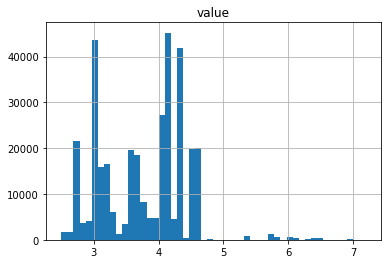

In [22]:
df.hist('value', bins=50)

In [23]:
df.sort_values('value', ascending=False, inplace=True)
# df

In [24]:
df.head()

,timestamp,sequence,last_pulse,value
314395,2021-02-20 03:03:27.145425,"[4, 0, 4, 2, 0, 2, 4, 0, 4, 2, 0]","[0., 0., 1., 0., 0.]",7.195067
335050,2021-02-20 04:08:12.187636,"[4, 0, 4, 2, 0, 2, 4, 0, 4, 2, 0]","[0., 0., 1., 0., 0.]",7.195067
233023,2021-02-19 22:47:36.960816,"[4, 0, 4, 1, 0, 1, 4, 0, 4, 1, 0]","[0., 1., 0., 0., 0.]",7.195067
332069,2021-02-20 03:58:52.631478,"[4, 0, 4, 2, 0, 2, 4, 0, 4, 2, 0]","[0., 0., 1., 0., 0.]",7.195067
234429,2021-02-19 22:52:01.086824,"[4, 0, 4, 2, 0, 2, 4, 0, 4, 2, 0]","[0., 0., 1., 0., 0.]",7.195067


In [25]:
df.to_csv(os.path.join(path, 'candidates_sorted.csv'))